<a href="https://colab.research.google.com/github/TK594/IA-flood-risk-project/blob/main/NozzleDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'The flow area at the end of the divergent section is called the nozzle exit area. The nozzle is usually made long enough (or the exit area is great enough) such that the pressure in the combustion chamber is reduced at the nozzle exit to the pressure existing outside the nozzle. It is under this condition, Pe=Pa where Pe is the pressure at the nozzle exit and Pa is the outside ambient pressure, that thrust is maximum and the nozzle is said to be adapted, also called optimum or correct expansion.'
http://www.braeunig.us/space/propuls.htm#:~:text=The%20force%20due%20to%20gas,It%20pushes%20the%20chamber%20upwards.

https://mrbremer.wordpress.com/2014/11/11/combustion-chamber-and-nozzle-design/
We must find that area of the nozzle where the gas pressure is equal to the outside atmospheric pressure (P_e=P_a). This area will then be the nozzle exit area.

P_a varies with height. 
Chamber pressure?? dk how realiable : https://space.stackexchange.com/questions/21758/how-is-chamber-pressure-determined-for-rocket-engines 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


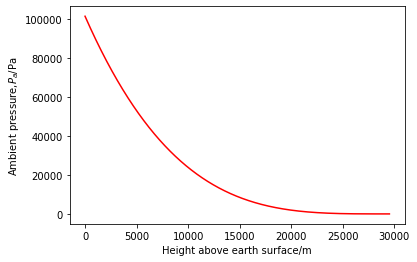

Pressure at sealevel =101325.0Pa, pressure at >100km is accepted to be 0 , our target altitude is 150km apogee.


In [1]:
#Everything is in SI units 
import math 
import numpy as np 
import matplotlib.pyplot as plt

#To determine atmospheric pressure at height h above earth surface 

h= np.linspace(0,150000,150000) #Height above earth surface 
P_0= 101325 #Sea_level standard atmospheric pressure 
C_p_air = 1004.68506 #constant pressure specific heat for air 
L = 0.00976 #temperature lapse-rate (g/C_p) for dry air 
T_0= 288.16 #Sea_level standard temperature 
g= 9.80665
M = 0.02896968 #Molar mass of dry air 
R = 8.31446261815324 #universal gas constant


P_a=P_0 *( 1- (g*h)/(C_p_air*T_0))**(C_p_air*M/R) #pressure of the ambient atmosphere 
plt.plot(h,P_a,'r')
plt.xlabel('Height above earth surface/m')
plt.ylabel('Ambient pressure,$P_{a}$/Pa')
plt.show()
print('Pressure at sealevel ={}Pa, pressure at >100km is accepted to be 0 , our target altitude is 150km apogee.'.format(P_a[0]))


In [2]:
#At sea level , these are some assumed quantities according to the mass estimation excel sheet 
F_0 = 12500
V_e = 1760
q= 7.1
t= 30




The basic thrust equation 

In [3]:
q= 7.1 #propellent mass flow rate
P_e= 1e5 #gas pressure at nozzle exit // ideally Pe should = Pa , so adjust this according to pressure we want max thrust 

k= 1.12 #specific heat ratio
P_c = 1.5e+6 #combustion chamber pressure 
T_c = 1135 #combustion chamber flame temperature 

V_e = np.sqrt(((2*k)/(k-1))*((R*T_c)/M)*(1-(P_e/P_c)**((k-1)/k)))  #ideal exhaust velocity 



To determine nozzle expansion ratio

In [4]:
#Assuming perfect gas law theory 
N_a = 6.02* 10**23 #Avogadro's constant
M = 22.5 #Average molecular weight of the exhaust gases (isopropyl nitrite)


P_t = P_c*(1+(k-1)/2)**(-k/(k-1)) #gas pressure at the nozzle throat 
T_t = T_c/(1+((k-1)/2))#gas temperature at the nozzle throat 
N_m = (2/(k-1))*(((P_c/P_a)**((k-1)/k))-1)#mach number at the nozzle exit 
A_t= (q/P_t)*(math.sqrt(R*T_t/(M*k)))#nozzle throat area
A_e = (A_t/N_m)*((1+((k-1)/2)*N_m**2)/((k+1)/2))**((k+1)/(2*(k-1)))#nozzle exit area 
exp_ratio = A_e/A_t

print(N_m)
print('The nozzle expansion ratio is {}'.format(exp_ratio))

F = q*V_e + (P_e-P_a)*A_e  #thrust on rocket 

print('The engine thrust is {} N'.format(F))


[5.57903113 5.57931376 5.57959641 ...        nan        nan        nan]
The nozzle expansion ratio is [1178.23947702 1178.86671635 1179.49431133 ...           nan           nan
           nan]
The engine thrust is [8546.99283041 8549.03605821 8551.08134097 ...           nan           nan
           nan] N


To determine burn duration , t 

In [5]:
C = F/q #effective exhaust velocity 
m_o= 316 #initial mass of rocket 
m_f= 62#final mass of rocket
V = C*np.log(m_o/m_f) #resulting velocity or change in velocity 
t= (m_o/q)*(1-(1/(np.exp(V/C))))  #burn duration for specific change in velocity

print('The burn duration is {}s'.format(t))

The burn duration is [35.77464789 35.77464789 35.77464789 ...         nan         nan
         nan]s
